# 그래디언트부스팅_예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
# 한글 폰트 적용
matplotlib.rc('font', family = 'Nanumgothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
import statsmodels.formula.api as smf
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라.   
데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)  
 - 목표변수(strength)  


In [2]:
df_raw = pd.read_csv('./datasets/Concrete.csv', engine = 'python')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df_raw.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [4]:
df_raw_y = df_raw['strength']
df_raw_x = df_raw.drop('strength', axis = 1, inplace = False)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.4, random_state = 1234)

print('traina data X size: {}'.format(df_train_x.shape))
print('train data Y size: {}'.format(df_train_y.shape))
print('test data X size: {}'.format(df_test_x.shape))
print('test data Y size: {}'.format(df_test_y.shape))


traina data X size: (618, 8)
train data Y size: (618,)
test data X size: (412, 8)
test data Y size: (412,)


In [6]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 0.951
Score on test set: 0.915


- training set : 0.951, test set : 0.915 로 나타났다.
- 기본 모형으로도 과적합되지 않고 test score가 좋은 것을 확인할 수 있다. 하지만 분석을 위해 파라미터 값을 조정해보자.

MSE를 기준으로 생성한 모델

In [7]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf= GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.646,0.621
1,20,0.807,0.773
2,30,0.870,0.835
3,40,0.898,0.863
4,50,0.915,0.878
5,60,0.925,0.888
6,70,0.934,0.898
7,80,0.940,0.904
8,90,0.946,0.910
9,100,0.951,0.915


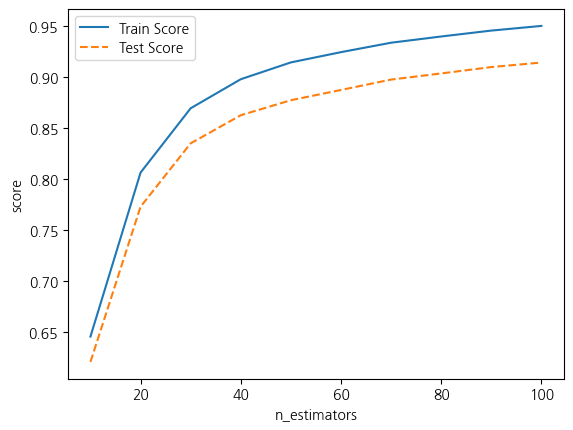

In [8]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

n_estimators = 100에서 성능이 가장 좋아서 100으로 설정했다.

In [9]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree= GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = v_min_samples_leaf)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.951,0.915
1,2,0.948,0.912
2,3,0.943,0.907
3,4,0.942,0.908
4,5,0.944,0.911
5,6,0.943,0.915
6,7,0.942,0.907
7,8,0.943,0.910
8,9,0.940,0.912
9,10,0.942,0.911


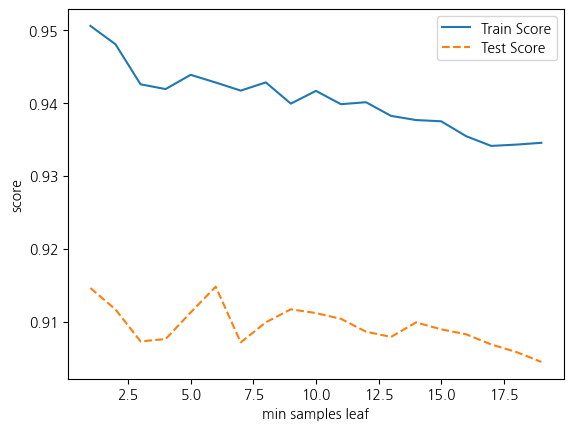

In [10]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

min_samples_leaf는 6에서 가장 높은 모습을 보여서 6으로 설정했다.

In [11]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree= GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSmaplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)



,MinSmaplesSplit,TrainScore,TestScore
0,4,0.943,0.915
1,6,0.943,0.915
2,8,0.943,0.915
3,10,0.943,0.915
4,12,0.943,0.915
5,14,0.941,0.911
6,16,0.941,0.909
7,18,0.941,0.909
8,20,0.940,0.909
9,22,0.941,0.910


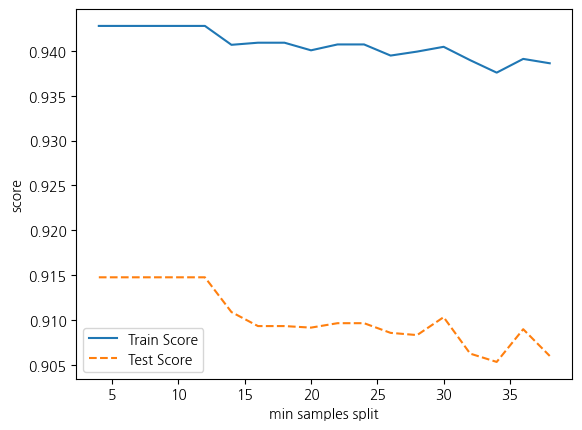

In [12]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

min_samples_split은 12 이후 부터 감소하는 모습을 보여 12로 설정했다.

In [13]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree= GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = 12, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.825,0.809
1,2,0.909,0.884
2,3,0.943,0.915
3,4,0.967,0.920
4,5,0.981,0.921
5,6,0.989,0.926
6,7,0.990,0.924
7,8,0.992,0.921
8,9,0.993,0.920
9,10,0.993,0.916


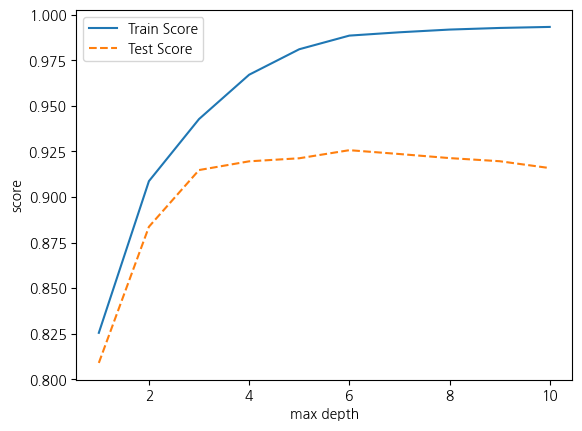

In [14]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

max depth는 6에서 가장 좋았기 때문에 6으로 설정했다.

In [15]:
# n_estimators = 100, min_samples_leaf = 6, min_samples_split = 12, max depth  = 6

In [16]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    tree= GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = 12, max_depth = 6, learning_rate = v_learning_rate)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.989,0.926
1,0.2,0.992,0.932
2,0.3,0.994,0.925
3,0.4,0.995,0.922
4,0.5,0.995,0.911
5,0.6,0.995,0.912
6,0.7,0.996,0.906
7,0.8,0.996,0.885
8,0.9,0.996,0.880


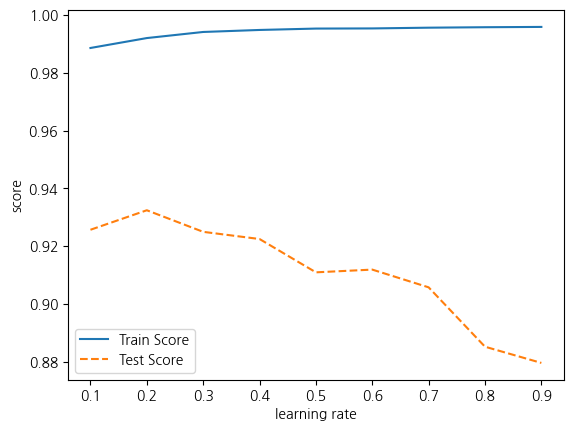

In [17]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

learning rate는 0.2에서 가장 좋았기 때문에 0.2로 설정했다.

In [30]:
rf_final = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                                min_samples_split = 12, max_depth = 6, learning_rate = 0.2)
rf_final.fit(df_train_x, df_train_y)
y_pred=rf_final.predict(df_test_x)
mae = mean_absolute_error(df_test_y, y_pred)
print("MAE:", mae)

print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

MAE: 2.967036028115221
Score on training set: 0.992
Score on test set: 0.932


최종 training score는 0.992, test score는 0.932로 기본모델의 test score인 0.915보다 증가한 것을 볼 수 있다. training score가 0.992로 과대적합된 거 같지만 test score 역시 높아서 해당 모델을 채택할 것 같다.


In [19]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.336
0,cement,0.280
3,water,0.144
4,superplasticizer,0.080
1,blast_furnace_slag,0.064
6,fine_aggregate,0.050
5,coarse_aggregate,0.025
2,fly_ash,0.020


Text(0, 0.5, '변수')

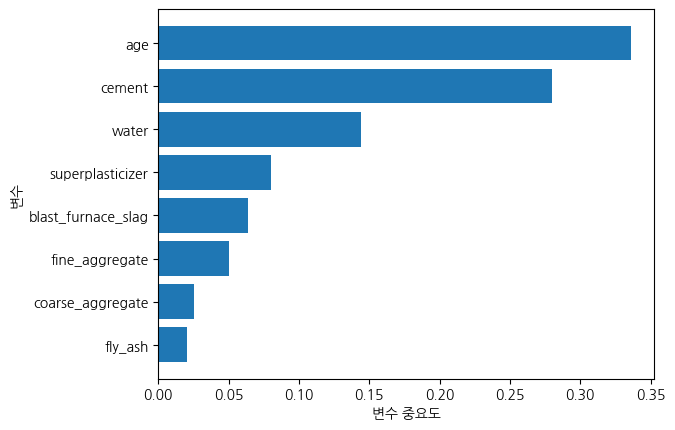

In [20]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [21]:
# n_estimators = 100, min_samples_leaf = 6, 
# min_samples_split = 12, max depth  = 6, learning rate = 0.2

해당 모델의 변수 중요도는 age, cement, water 순이며 이는 이전에 의사결정나무와 랜덤 포레스트로 판단했던 결과와 동일하다.

MSE를 기준으로 생성한 모델

In [22]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf= GradientBoostingRegressor(criterion = 'friedman_mse', n_estimators = v_n_estimators, random_state = 1234)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.646,0.621
1,20,0.807,0.773
2,30,0.870,0.835
3,40,0.898,0.863
4,50,0.915,0.878
5,60,0.925,0.888
6,70,0.934,0.898
7,80,0.940,0.904
8,90,0.946,0.910
9,100,0.951,0.915


n_estimators는 100으로 설정한다.

In [23]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree= GradientBoostingRegressor(criterion = 'friedman_mse', random_state = 1234, n_estimators = 100, min_samples_leaf = v_min_samples_leaf)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.951,0.915
1,2,0.948,0.912
2,3,0.943,0.907
3,4,0.942,0.908
4,5,0.944,0.911
5,6,0.943,0.915
6,7,0.942,0.907
7,8,0.943,0.910
8,9,0.940,0.912
9,10,0.942,0.911


MinSamplesLeaf은 6으로 설정한다.

In [24]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree= GradientBoostingRegressor(criterion = 'friedman_mse', random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSmaplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)
 

,MinSmaplesSplit,TrainScore,TestScore
0,4,0.943,0.915
1,6,0.943,0.915
2,8,0.943,0.915
3,10,0.943,0.915
4,12,0.943,0.915
5,14,0.941,0.911
6,16,0.941,0.909
7,18,0.941,0.909
8,20,0.940,0.909
9,22,0.941,0.910


MinSmaplesSplit은 12로 설정했다.

In [25]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree= GradientBoostingRegressor(criterion = 'friedman_mse', random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = 12, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.825,0.809
1,2,0.909,0.884
2,3,0.943,0.915
3,4,0.967,0.920
4,5,0.981,0.921
5,6,0.989,0.926
6,7,0.990,0.924
7,8,0.992,0.921
8,9,0.993,0.920
9,10,0.993,0.916


Depth는 5로 설정했다. 앞선 파라미터들의 경우 mse와 mae의 차이가 업었지만 여기서 차이가 발생했다.

In [26]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    tree= GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = 12, max_depth = 5, learning_rate = v_learning_rate)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.981,0.921
1,0.2,0.989,0.930
2,0.3,0.991,0.923
3,0.4,0.993,0.920
4,0.5,0.993,0.915
5,0.6,0.995,0.900
6,0.7,0.995,0.891
7,0.8,0.995,0.867
8,0.9,0.995,0.856


In [27]:
rf_final = GradientBoostingRegressor(criterion = 'friedman_mse', random_state = 1234, n_estimators = 100, min_samples_leaf = 6,
                                min_samples_split = 12, max_depth = 5, learning_rate = 0.2)
rf_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format( rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.989
Score on test set: 0.930


>결론  
기준을 mae로 생성한 모델의 최종 training score는 0.963, test score는 0.91이다. mse로 생성한 최종 모델 test score인 0.932보다는 낮은 모습을 볼 수 있다. 다만 기본모델, 파라미터를 설정한 모델, 기준을 다르게 준 모델 모두 test데이터에 대해 좋은 성능을 보이는 것을 보아 해당 데이터에 대한 그래디언트 부스팅 모델의 예측 성능이 좋다고 결론 내릴 수 있다.
